# Financial Distress Prediction - Ganesh Ram Gururajan

## Data import, Visualization, and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Financial Distress.csv')

In [3]:
data.shape

(3672, 86)

In [4]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [5]:
data['Company'].value_counts().count()

422

In [6]:
data = data.drop(['Company'],axis = 1)

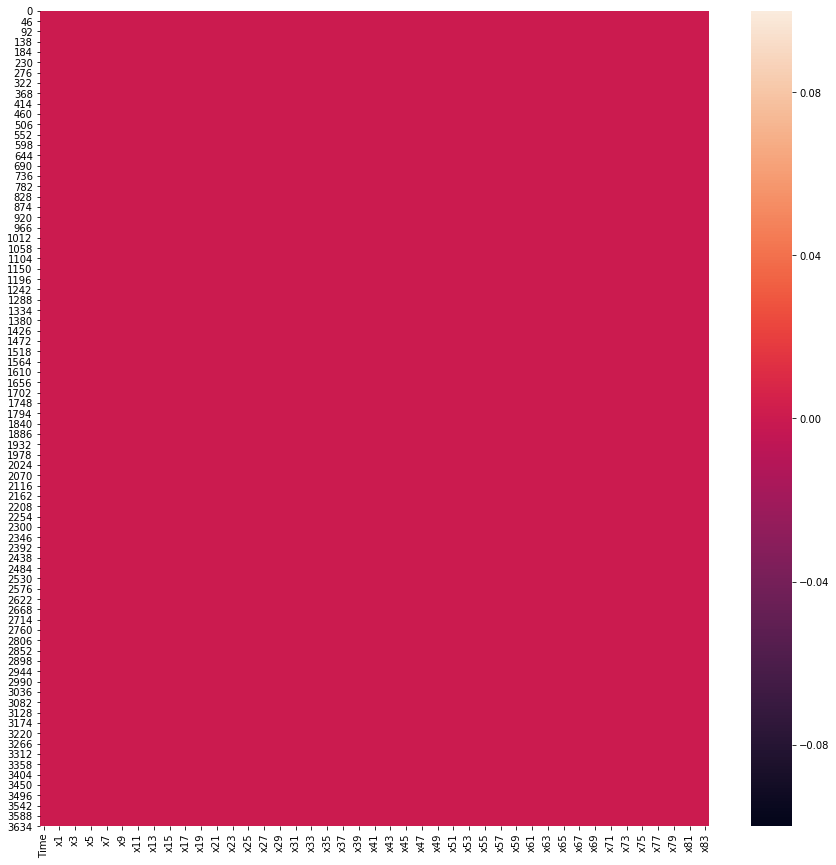

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data['Financial Distress'].isnull().value_counts()

False    3672
Name: Financial Distress, dtype: int64

#### According to Data Description on Kaggle, if the value of Financial Distress of a company is greater than 0.5, then the company is safe, else it is financially distressed

In [9]:
def fin_clean(fin):
    if fin >= -0.5:
        return 0
    else:
        return 1

In [10]:
data['Financial Distress'] = data['Financial Distress'].apply(fin_clean)

In [11]:
data['Financial Distress'].value_counts()

0    3536
1     136
Name: Financial Distress, dtype: int64

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['Financial Distress'], axis =1)

In [14]:
y = data['Financial Distress']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=101, stratify = y)

## Machine Learning Algorithms

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
from sklearn.metrics import classification_report

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
prediction1 = dtree.predict(X_test)

In [21]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1238
           1       0.21      0.19      0.20        48

    accuracy                           0.94      1286
   macro avg       0.59      0.58      0.58      1286
weighted avg       0.94      0.94      0.94      1286



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

/home/ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
prediction2 = lr.predict(X_test)

In [26]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1238
           1       0.47      0.15      0.22        48

    accuracy                           0.96      1286
   macro avg       0.72      0.57      0.60      1286
weighted avg       0.95      0.96      0.95      1286



### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gnb = GaussianNB()

In [29]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
prediction3 = lr.predict(X_test)

In [31]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1238
           1       0.47      0.15      0.22        48

    accuracy                           0.96      1286
   macro avg       0.72      0.57      0.60      1286
weighted avg       0.95      0.96      0.95      1286



### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf = RandomForestClassifier(n_estimators=250)

In [139]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
prediction4 = rf.predict(X_test)

In [141]:
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1238
           1       0.58      0.15      0.23        48

    accuracy                           0.96      1286
   macro avg       0.78      0.57      0.61      1286
weighted avg       0.95      0.96      0.95      1286



### KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier()

In [145]:
error_rate = []

for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

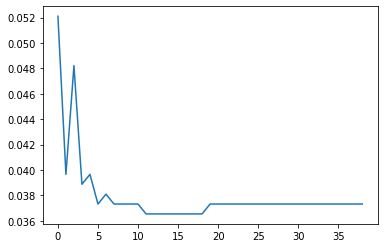

In [146]:
plt.plot(error_rate)

In [163]:
knn = KNeighborsClassifier(n_neighbors=9)

In [164]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [165]:
prediction5 = knn.predict(X_test)

In [166]:
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1238
           1       0.50      0.06      0.11        48

    accuracy                           0.96      1286
   macro avg       0.73      0.53      0.55      1286
weighted avg       0.95      0.96      0.95      1286



### XGBoost

In [167]:
from xgboost import XGBClassifier

In [192]:
xgb = XGBClassifier(n_estimators=20)

In [193]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [194]:
prediction6 = xgb.predict(X_test)

In [195]:
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1238
           1       0.47      0.19      0.27        48

    accuracy                           0.96      1286
   macro avg       0.72      0.59      0.62      1286
weighted avg       0.95      0.96      0.95      1286



### Adaboost

In [196]:
from sklearn.ensemble import AdaBoostClassifier

In [209]:
adab = AdaBoostClassifier(n_estimators=20)

In [210]:
adab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=20, random_state=None)

In [211]:
prediction7 = adab.predict(X_test)

In [212]:
print(classification_report(y_test,prediction7))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1238
           1       0.31      0.27      0.29        48

    accuracy                           0.95      1286
   macro avg       0.64      0.62      0.63      1286
weighted avg       0.95      0.95      0.95      1286

